In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
import math
import re

In [2]:
def xsect_io(filen):
    """
    Get cross sections from files from Roger.
    
    filen: photoA.txt, or photoB or photoC.
    """
    # read in the data to a big list
    with open(filen, "r") as photo:
        filecontents = photo.read().splitlines()

    # get length of wavelengths and start index for actual values
    N = int(filecontents[0].split()[0])
    n = 2  # start at 2 to skip the line with the number of wavelength entries and the line that just says "wavelength"
    
    # collect the wavelengths
    wavelength = np.asarray(filecontents[n:n+N]).astype(float)
    total_absorption_xsect = dict()
    total_ionization_xsect = dict()
    rxn_xsects = dict()  # cross sections by reaction
#     print(wavelength)

    # this collects the exact lines where a new species is declared
    specieslines = [i for i in range(len(filecontents)) if "SPECIES" in filecontents[i]]

    # loop through each species
    for i in specieslines:
        spc = filecontents[i].split()[1]
        num_rxns = int(filecontents[i].split()[2])

        # total abs spectra goes from i+3 for N items where N is the number of wavelengths, so len(wavelengthA)
        abs_start = i+3
        abs_end = abs_start + N
        total_absorption_xsect[spc] = np.asarray(filecontents[abs_start:abs_end]).astype(float)

        # start for the ion xsection is 2 after the total_abs_xsect range ends.
        # It's only 2 because we include the first item in the count of N.
        # just trust me on this k?
        ion_start = abs_end + 2
        ion_end = ion_start+N
        total_ionization_xsect[spc] = np.asarray(filecontents[ion_start:ion_end]).astype(float)

        rxn_label = ion_end + 1
        rxn_xsect_start = rxn_label + 1

        # now do the actual reaction measurements
        for j in range(0, num_rxns):
            rxn_xsects[filecontents[rxn_label]] = np.asarray(filecontents[rxn_xsect_start:rxn_xsect_start+N]).astype(float)

            rxn_label += (N+2)
            rxn_xsect_start = rxn_label + 1

    return wavelength/10, total_absorption_xsect, total_ionization_xsect, rxn_xsects

In [3]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [4]:
wvsA, absA, ionA, xsectsA = xsect_io("../Resources/photoA.txt")
wvsB, absB, ionB, xsectsB = xsect_io("../Resources/photoB.txt")
wvsC, absC, ionC, xsectsC = xsect_io("../Resources/photoC.txt")

In [5]:
rxnsA_set = set(xsectsA.keys())
rxnsB_set = set(xsectsB.keys())
rxnsC_set = set(xsectsC.keys())

In [6]:
rxns_set = rxnsA_set.union(rxnsB_set, rxnsC_set)
rxns_set

{'CO + hv => C + O',
 'CO + hv => C + OP + E',
 'CO + hv => COP + E',
 'CO + hv => O + CP + E',
 'CO2 + hv => C + O + O',
 'CO2 + hv => C + O2',
 'CO2 + hv => CO + O',
 'CO2 + hv => CO + O1D',
 'CO2 + hv => CO2P + E',
 'CO2 + hv => CO2PP + E + E',
 'CO2 + hv => COP + O + E',
 'CO2 + hv => COP + OP + E',
 'CO2 + hv => CP + O2 + E',
 'CO2 + hv => CPP + O2 + E',
 'CO2 + hv => OP + CO + E',
 'CO2 + hv => OP + CP + O',
 'H + hv => HP + E',
 'H2 + hv => H + H',
 'H2 + hv => H2P + E',
 'H2 + hv => HP + H + E',
 'H2O + hv => H2OP + E',
 'H2O + hv => HP + OH+ E',
 'H2O + hv => O + H + H',
 'H2O + hv => O1D + H2',
 'H2O + hv => OH + H',
 'H2O + hv => OHP + H + E',
 'H2O + hv => OP + H2 + E',
 'H2O2 + hv => H2O2P + E',
 'H2O2 + hv => OH + OH',
 'HO2 + hv => OH + O',
 'HO2NO2 + hv => HO2 + NO2',
 'HO2NO2 + hv => OH + NO3',
 'HONO + hv => OH + NO',
 'HONO2 + hv => OH + NO2',
 'He + hv => HeP + E',
 'N2 + hv => N2P + E',
 'N2 + hv => NP + N + E',
 'N2O + hv => N2 + O1D',
 'N2O + hv => N2OP + E',
 'N

In [8]:
print(wvsA)
print(wvsB)
print(wvsC)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5 27.5
 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5 41.5
 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5 55.5
 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5 67.5 68.5 69.5
 70.5 71.5 72.5 73.5 74.5]
[ 74.5  75.5  76.5  77.5  78.5  79.5  80.5  81.5  82.5  83.5  84.5  85.5
  86.5  87.5  88.5  89.5  90.5  91.5  92.5  93.5  94.5  95.5  96.5  97.5
  98.5  99.5 100.5 101.5 102.5 103.5 104.5 105.5 106.5 107.5 108.5]
[108.5 109.5 110.5 111.5 112.5 113.5 114.5 115.5 116.5 117.5 118.5 119.5
 120.5 121.5 122.5 123.5 124.5 125.5 126.5 127.5 128.5 129.5 130.5 131.5
 132.5 133.5 134.5 135.5 136.5 137.5 138.5 139.5 140.5 141.5 142.5 143.5
 144.5 145.5 146.5 147.5 148.5 149.5 150.5 151.5 152.5 153.5 154.5 155.5
 156.5 157.5 158.5 159.5 160.5 161.5 162.5 163.5 164.5 165.5 166.5 167.5
 168.5 169.5 170.5 171.5 172.5 173.5 17

So for each of these sets of wavelengths and xsects we need to leave off the first entry in B and C because they overlap.

In [7]:
xsects_0_to_300 = dict()
totals_0_to_300 = dict()
fractions_0_to_300 = dict()

wvs_0_to_300 = np.hstack((wvsA, wvsB[1:], wvsC[1:]))

for rxn in rxns_set:
    norm_key = rxn.split()[0]
    
    # need to account for whether it's ionization or dissociation
    if "E" in rxn:
#         print("{} is photoionization".format(rxn))
        
        try:
            iA = ionA[norm_key]
        except:
            iA = np.zeros(len(wvsA))
                          
        try:
            iB = ionB[norm_key][1:]
        except:
            iB = np.zeros(len(wvsB[1:]))

        try:
            iC = ionC[norm_key][1:]
        except:
            iC = np.zeros(len(wvsC[1:]))
        
        total_xsect = np.hstack((iA, iB, iC))
    else:
#         print("{} is photodissociation".format(rxn))
        try:
            aA = absA[norm_key]
        except:
            aA = np.zeros(len(wvsA))
                          
        try:
            aB = absB[norm_key][1:]
        except:
            aB = np.zeros(len(wvsB[1:]))

        try:
            aC = absC[norm_key][1:]
        except:
            aC = np.zeros(len(wvsC[1:]))
        
        total_xsect = np.hstack((aA, aB, aC))
    
#     print("Normalization array is {}".format(total_xsect))
    totals_0_to_300[rxn] = total_xsect
    
    # Now stack the actual xsect data
    try:
        xA = xsectsA[rxn]
    except:
        xA = np.zeros(len(wvsA))
    
    try:
        xB = xsectsB[rxn][1:]
    except:
        xB = np.zeros(len(wvsB[1:]))
        
    try:
        xC = xsectsC[rxn][1:]
    except:
        xC = np.zeros(len(wvsC[1:]))
    
    fractions_0_to_300[rxn] = np.hstack((xA, xB, xC))
    
    xsects_0_to_300[rxn] = np.multiply(fractions_0_to_300[rxn], totals_0_to_300[rxn])

Check that the crosssections look good and there's nothing weird going on by making plots:

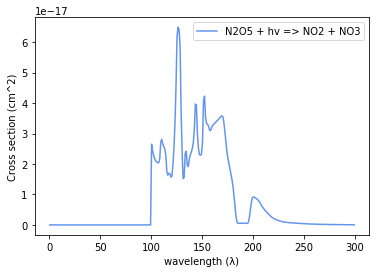

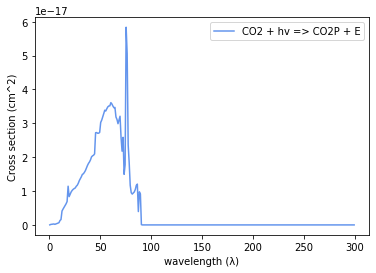

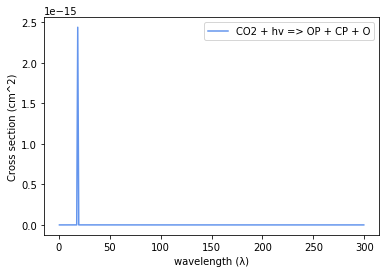

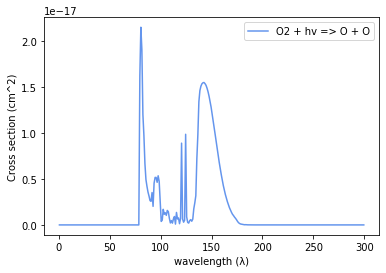

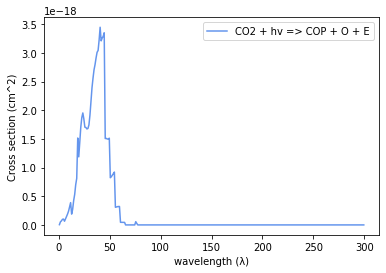

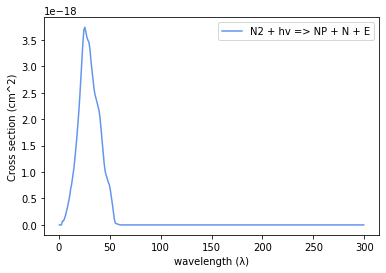

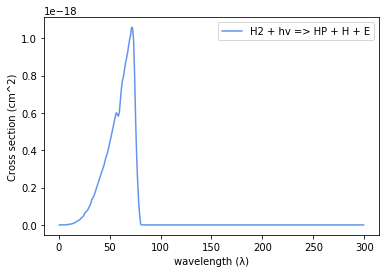

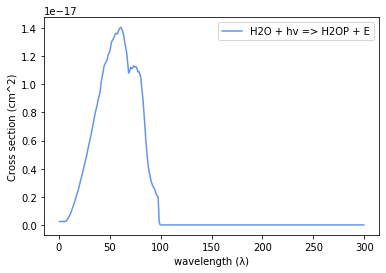

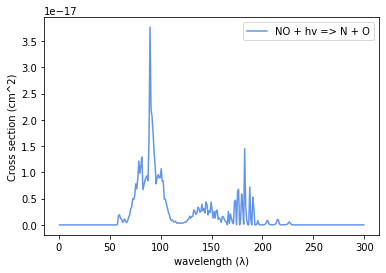

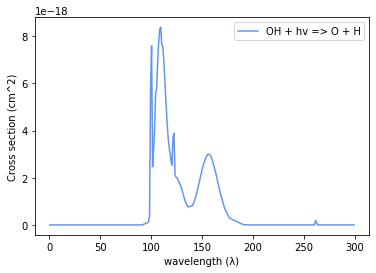

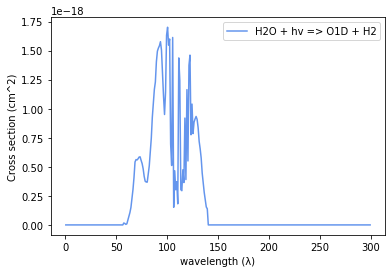

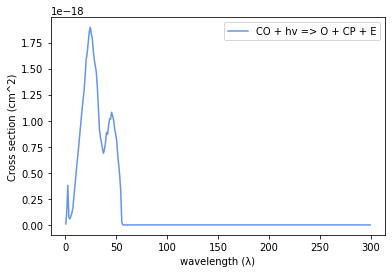

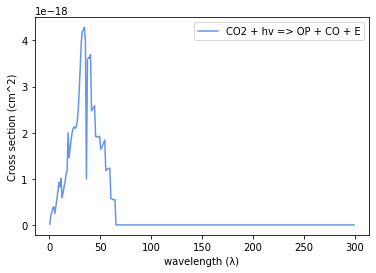

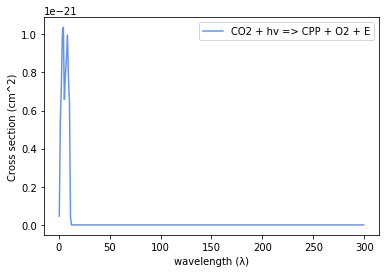

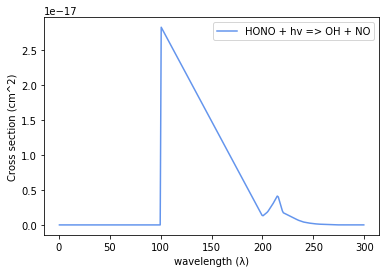

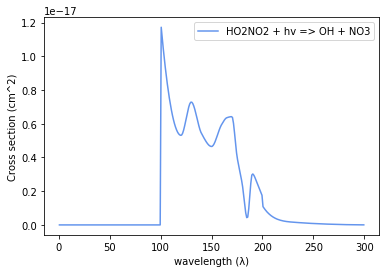

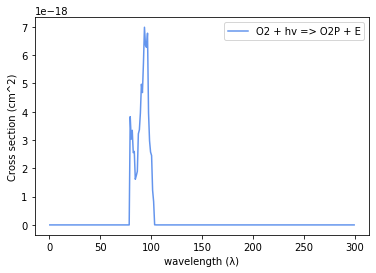

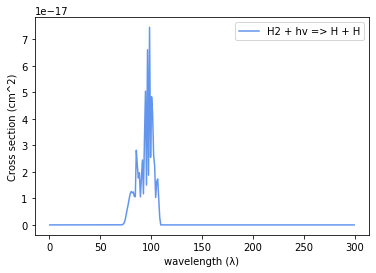

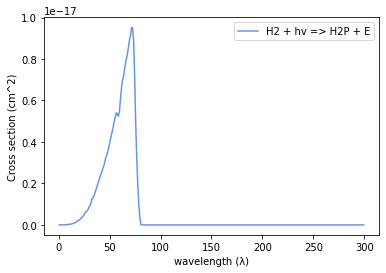

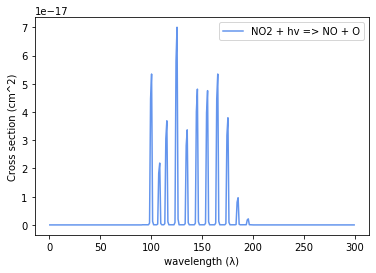

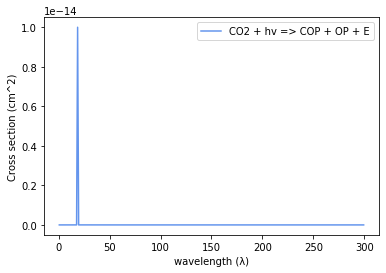

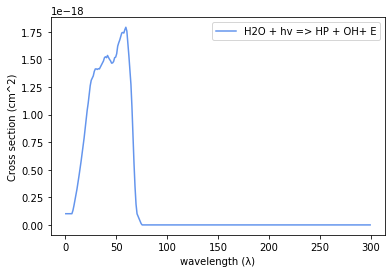

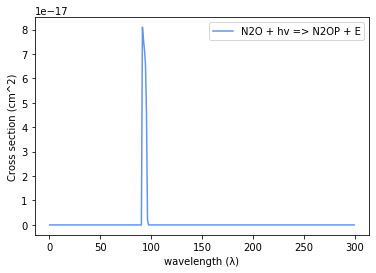

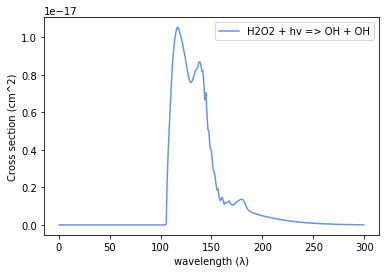

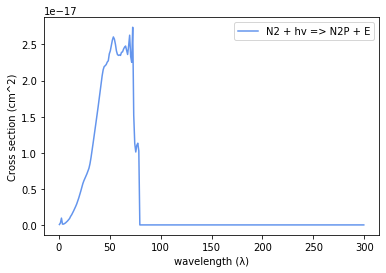

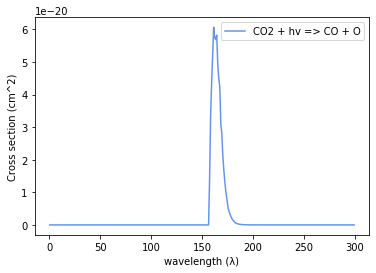

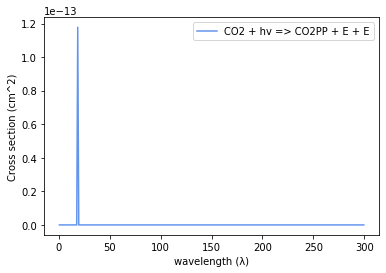

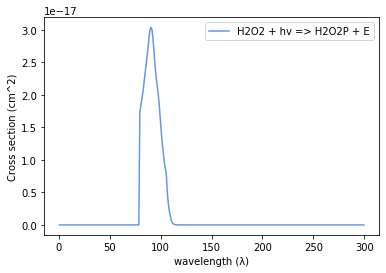

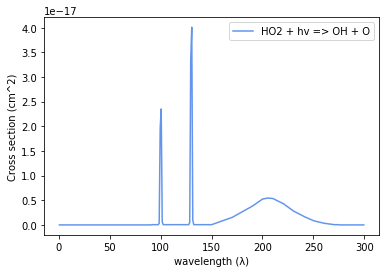

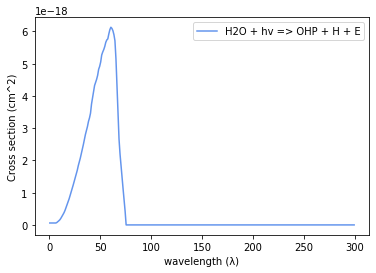

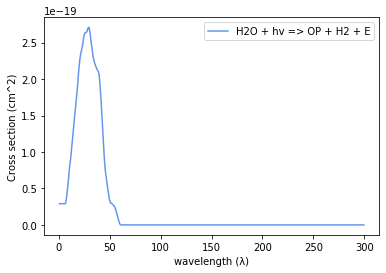

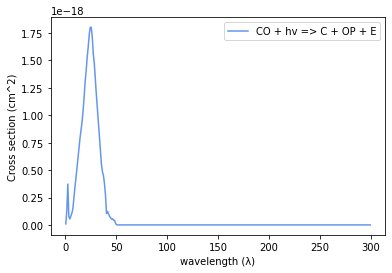

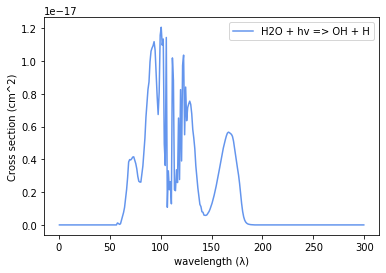

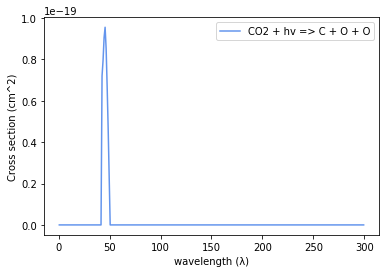

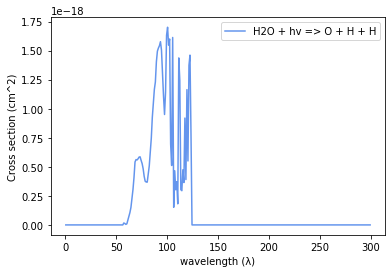

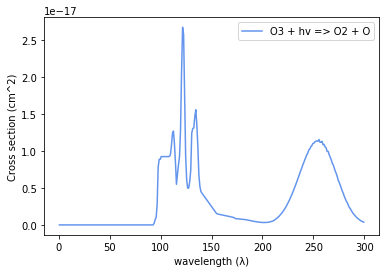

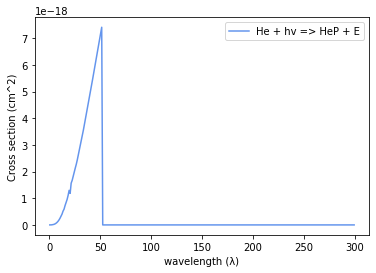

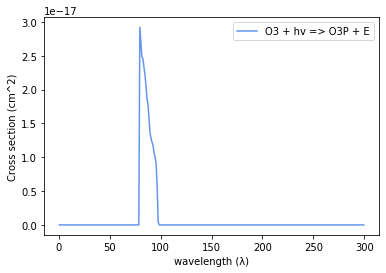

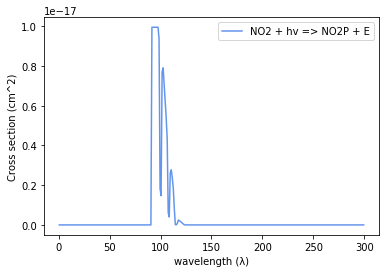

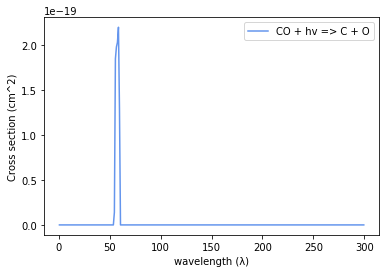

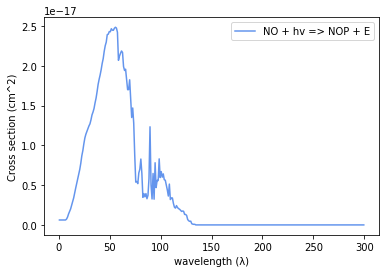

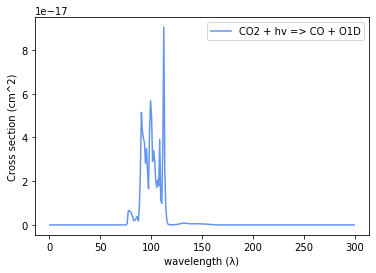

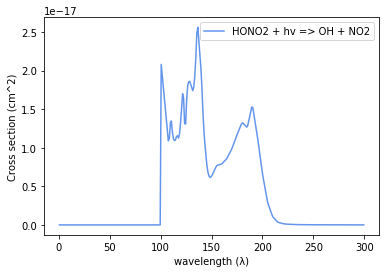

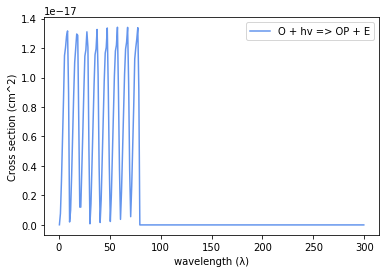

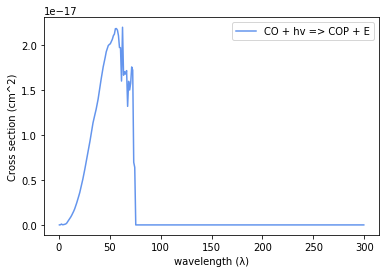

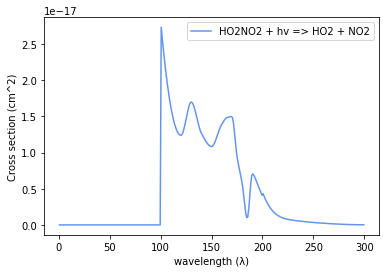

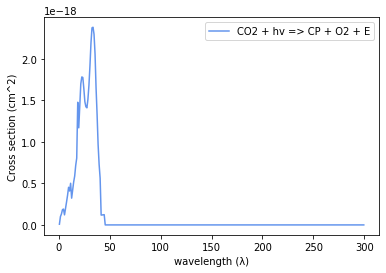

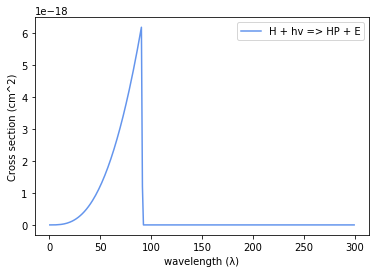

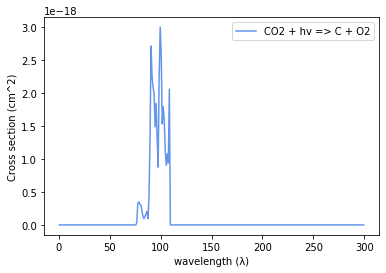

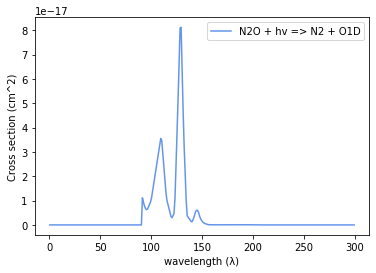

In [8]:
for k in xsects_0_to_300:
    fig = plt.figure()
    plt.plot(wvs_0_to_300, xsects_0_to_300[k], color="cornflowerblue", label=k)
    plt.xlabel("wavelength (λ)")
    plt.ylabel("Cross section (cm^2)")
#     plt.yscale("log")
    plt.legend()
    plt.show()
    

Get a list of the reactions since I don't need them all:

In [12]:
for k in xsects_0_to_300:
    print(k)

CO + hv => C + O
N2 + hv => N2P + E
CO2 + hv => C + O + O
CO2 + hv => CO + O
CO + hv => COP + E
H2O2 + hv => H2O2P + E
HONO2 + hv => OH + NO2
NO + hv => N + O
N2O + hv => N2 + O1D
HO2NO2 + hv => OH + NO3
O + hv => OP + E
CO2 + hv => OP + CP + O
HO2 + hv => OH + O
CO2 + hv => CO2P + E
H2O + hv => OP + H2 + E
NO + hv => NOP + E
CO2 + hv => OP + CO + E
CO2 + hv => CO2PP + E + E
N2O5 + hv => NO2 + NO3
CO2 + hv => CP + O2 + E
NO2 + hv => NO + O
H2O + hv => HP + OH+ E
H2O + hv => O + H + H
N2O + hv => N2OP + E
CO + hv => C + OP + E
CO + hv => O + CP + E
H2 + hv => H2P + E
He + hv => HeP + E
O3 + hv => O3P + E
CO2 + hv => CO + O1D
HO2NO2 + hv => HO2 + NO2
H2O + hv => OHP + H + E
HONO + hv => OH + NO
H2O + hv => O1D + H2
CO2 + hv => CPP + O2 + E
H2O + hv => H2OP + E
N2 + hv => NP + N + E
O3 + hv => O2 + O
H2O + hv => OH + H
CO2 + hv => C + O2
NO2 + hv => NO2P + E
OH + hv => O + H
CO2 + hv => COP + OP + E
O2 + hv => O2P + E
H2 + hv => HP + H + E
O2 + hv => O + O
H + hv => HP + E
H2 + hv => H + 

I went through that printout in my notes and collected the reactions I need to keep. HEre they are.

In [18]:
# NOTE these two lists are in order!! Elements in Jratetags correspond to those in keep_rxns. Do not alter! Or do it wisely if you must!

keep_rxns = ["H2O + hv => H2OP + E", "H2O + hv => OP + H2 + E", "CO + hv => C + O", "CO + hv => COP + E", "N2O + hv => N2 + O1D", "H2 + hv => H2P + E", 
             "CO + hv => C + OP + E", "NO2 + hv => NO + O", "CO2 + hv => C + O2", "CO2 + hv => CPP + O2 + E", "NO + hv => NOP + E", "H2 + hv => HP + H + E", 
             "H2O + hv => HP + OH+ E", "H2O2 + hv => H2O2P + E", "N2 + hv => N2P + E", "CO2 + hv => COP + OP + E", "CO + hv => O + CP + E", "CO2 + hv => OP + CP + O", 
             "NO + hv => N + O", "CO2 + hv => CP + O2 + E", "CO2 + hv => CO2P + E", "O + hv => OP + E", "H2O + hv => OHP + H + E", "NO2 + hv => NO2P + E", 
             "CO2 + hv => COP + O + E", "N2 + hv => NP + N + E", "CO2 + hv => C + O + O", "CO2 + hv => CO2PP + E + E", "CO2 + hv => OP + CO + E", 
             "O2 + hv => O2P + E", "H + hv => HP + E", "N2O + hv => N2OP + E", "O3 + hv => O3P + E"]

Jratetags = ["JH2OtoH2Opl", "JH2OtoOplpH2", "JCOtoCpO", "JCOtoCOpl", "JN2OtoN2pO1D ", "JH2toH2pl", "JCOtoCpOpl", "JNO2toNOpO", "JCO2toCpO2", "JCO2toCplplpO2", 
             "JNOtoNOpl", "JH2toHplpH", "JH2OtoHplpOH", "JH2O2toH2O2pl", "JN2toN2pl", "JCO2toCOplpOpl", "JCOtoOpCpl", "JCO2toOplpCplpO", "JNOtoNpO", "JCO2toCplpO2", 
             "JCO2toCO2pl", "JOtoOpl", "JH2OtoOHplpH", "JNO2toNO2pl", "JCO2toCOplpO", "JN2toNplpN", "JCO2toCpOpO", "JCO2toCO2plpl", "JCO2toOplpCO", "JO2toO2pl", 
             "JHtoHpl", "JN2OtoN2Opl", "JO3toO3pl"]

In [19]:
# Go through the reactions we need to save the cross sections for and save them to files in the uvxsect folder
for (kr, Jrate) in zip(keep_rxns, Jratetags):
    
    print(kr)
    print(Jrate)
    print()
    dummy_arr = np.zeros((len(xsects_0_to_300[kr]), 2))
    dummy_arr[:, 0] = wvs_0_to_300
    dummy_arr[:, 1] = xsects_0_to_300[kr]
    print(dummy_arr[0:10])
    
    np.savetxt("uvxsect/"+Jrate+".dat", dummy_arr, header="Wavelength (nm)    Crosssection (cm^2)", delimiter=",", comments="# ")

H2O + hv => H2OP + E
JH2OtoH2Opl

[[5.000000e-01 2.415998e-19]
 [1.500000e+00 2.415998e-19]
 [2.500000e+00 2.415998e-19]
 [3.500000e+00 2.415998e-19]
 [4.500000e+00 2.415998e-19]
 [5.500000e+00 2.415998e-19]
 [6.500000e+00 2.415998e-19]
 [7.500000e+00 3.099655e-19]
 [8.500000e+00 4.141072e-19]
 [9.500000e+00 5.323357e-19]]
H2O + hv => OP + H2 + E
JH2OtoOplpH2

[[5.0000000e-01 2.9143246e-20]
 [1.5000000e+00 2.9143246e-20]
 [2.5000000e+00 2.9143246e-20]
 [3.5000000e+00 2.9143246e-20]
 [4.5000000e+00 2.9143246e-20]
 [5.5000000e+00 2.9143246e-20]
 [6.5000000e+00 2.9143246e-20]
 [7.5000000e+00 3.7389935e-20]
 [8.5000000e+00 4.9952144e-20]
 [9.5000000e+00 6.4213589e-20]]
CO + hv => C + O
JCOtoCpO

[[0.5 0. ]
 [1.5 0. ]
 [2.5 0. ]
 [3.5 0. ]
 [4.5 0. ]
 [5.5 0. ]
 [6.5 0. ]
 [7.5 0. ]
 [8.5 0. ]
 [9.5 0. ]]
CO + hv => COP + E
JCOtoCOpl

[[5.0000000e-01 4.7456640e-22]
 [1.5000000e+00 1.8408500e-20]
 [2.5000000e+00 9.4215450e-20]
 [3.5000000e+00 2.2134000e-20]
 [4.5000000e+00 3.0359680e-20]
 [5